# Financial Inclusion in Africa

Research Question :  What is the state of Financial inclusion in East Africa and what are the factors that affect financial inclusion in East Africa.

Specific Questions : 
1. What is the relationship between a person's level of education and access to financial services.
2. Does Age play a role in financial inclusivity in Africa?
3. Does the type of job a person have affect access to financial services?
4. What is the role of Gender in financial Inclusion in Africa.


Metric of Success : Create a Model with higher than 80% Accuracy

Appropriateness of the data : The data will be sufficient to answer the research questions.

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [526]:
finance_df = pd.read_csv('finance.csv')
finance_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [527]:
finance_df.shape

(23524, 13)

In [528]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [529]:
finance_df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

# Data Preparation and Cleaning

1. Data Validity

In [530]:
#Dropping Unique ID Because It will not be needed in this analysis
finance_df.drop('uniqueid', inplace=True, axis=1)

In [531]:
finance_df.head(2)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


2. Data Uniformity

In [532]:
finance_df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [533]:
#Renaming some column names
finance_df = finance_df.rename({"Has a Bank account":"Bank_Account","Type of Location":"Location",
                               "Cell Phone Access":"Phone_Access","Respondent Age":"Age","gender_of_respondent":"Gender",
                               "The relathip with head":"Head_Relationship","Level of Educuation":"Education",
                               "Type of Job":"Job_Type"}, axis='columns')

In [534]:
#Making sure that all column names are uniform
finance_df.columns = finance_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [535]:
finance_df.head(1)

,country,year,bank_account,location,phone_access,household_size,age,gender,head_relationship,marital_status,education,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


3. Data Consistency

In [536]:
#Dropping Duplicates
finance_df = finance_df.drop_duplicates()

In [537]:
finance_df.shape

(19151, 12)

4. Data Completeness

In [538]:
#Finding the percentage of missing values
finance_df.isnull().sum()/len(finance_df['bank_account'])

country              0.000731
year                 0.000000
bank_account         0.001880
location             0.000783
phone_access         0.000574
household_size       0.001410
age                  0.001723
gender               0.001723
head_relationship    0.000157
marital_status       0.001566
education            0.001462
job_type             0.001514
dtype: float64

In [539]:
#Dropping the Missing values since they accumulate to less than 1% of the total data
finance_df = finance_df.dropna()

In [540]:
#Checking if the missing values have been taken care of
finance_df.isnull().sum()/len(finance_df['bank_account'])

country              0.0
year                 0.0
bank_account         0.0
location             0.0
phone_access         0.0
household_size       0.0
age                  0.0
gender               0.0
head_relationship    0.0
marital_status       0.0
education            0.0
job_type             0.0
dtype: float64

More Cleaning

In [541]:
#Year has some data that seems to be incorrect
finance_df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [542]:
finance_df[finance_df['year'] == 2039]

,country,year,bank_account,location,phone_access,household_size,age,gender,head_relationship,marital_status,education,job_type
7014,Rwanda,2039,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [543]:
#Dropping rows where year is greater than 2018
finance_df =  finance_df[finance_df['year'] <= 2018]

In [544]:
finance_df['year'].unique()

array([2018, 2016, 2017])

In [545]:
finance_df[finance_df['age'] < 18]

,country,year,bank_account,location,phone_access,household_size,age,gender,head_relationship,marital_status,education,job_type
52,Kenya,2018,No,Urban,No,5.0,16.0,Female,Other relative,Single/Never Married,Primary education,Remittance Dependent
53,Kenya,2018,No,Rural,Yes,2.0,17.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
76,Kenya,2018,No,Urban,No,4.0,17.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
81,Kenya,2018,No,Rural,No,4.0,17.0,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
104,Kenya,2018,Yes,Urban,No,4.0,16.0,Female,Other relative,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
23448,Uganda,2018,No,Rural,Yes,5.0,17.0,Female,Child,Single/Never Married,Secondary education,No Income
23464,Uganda,2018,No,Rural,No,6.0,16.0,Male,Parent,Single/Never Married,Primary education,No Income
23471,Uganda,2018,No,Rural,Yes,15.0,17.0,Female,Other relative,Married/Living together,Secondary education,Self employed
23499,Uganda,2018,No,Urban,No,6.0,16.0,Female,Parent,Single/Never Married,Secondary education,No Income


In [546]:
#Checking the minimum age in the dataset
finance_df['age'].min()

16.0

Assuming that the minimum age required to be able to own a bank account is 18 Years, I will filter out all respondents below 18 Years from the dataset

In [547]:
#Filtering out respondents below 18 Years
finance_df =  finance_df[finance_df['age'] >= 18]

In [548]:
finance_df['age'].min()

18.0

Checking for Outliers

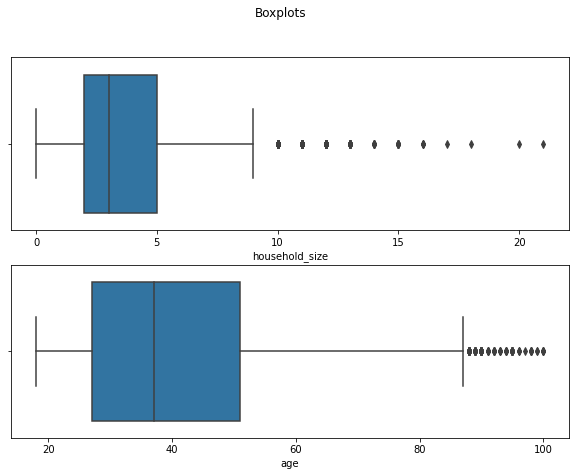

In [549]:
# Checking for Outliers
fig, ((ax1, ax2)) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(finance_df['household_size'], ax=ax1)
sns.boxplot(finance_df['age'], ax=ax2)
plt.show()

In [550]:
#Creating a threshold to determine outliers.
Maximum_threshold = finance_df['household_size'].quantile(0.999)
Minimum_threshold = finance_df['household_size'].quantile(0.001)

In [551]:
#Removing Outliers
finance_df = finance_df[(finance_df['household_size']< Maximum_threshold) & (finance_df['household_size']< Maximum_threshold)] 

In [552]:
finance_df.shape

(18173, 12)

# Exploratory Data Analysis

# 1. Univariate Data Analysis

In [553]:
finance_df.describe()

,year,household_size,age
count,18173.00000,18173.000000,18173.000000
mean,2017.05101,3.696968,40.514224
std,0.86484,2.300722,16.741327
min,2016.00000,0.000000,18.000000
25%,2016.00000,2.000000,27.000000
50%,2017.00000,3.000000,37.000000
75%,2018.00000,5.000000,51.000000
max,2018.00000,13.000000,100.000000


The data is beterrn 2016 and 2018. The maximum age is 100 and the minimum age is 18. 

In [554]:
finance_df.describe(include = 'object')

,country,bank_account,location,phone_access,gender,head_relationship,marital_status,education,job_type
count,18173,18173,18173,18173,18173,18173,18173,18173,18173
unique,4,2,2,2,2,6,5,7,10
top,Rwanda,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,6356,15062,11204,13608,10855,10503,8610,9027,4722


In [555]:
finance_df.head(2)

,country,year,bank_account,location,phone_access,household_size,age,gender,head_relationship,marital_status,education,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


With Bank Accounts = 3111
Without Bank Accounts = 15062
Proportion of people with bank_accounts  = 17.12%
Proportion of people without bank_accounts  = 82.88%


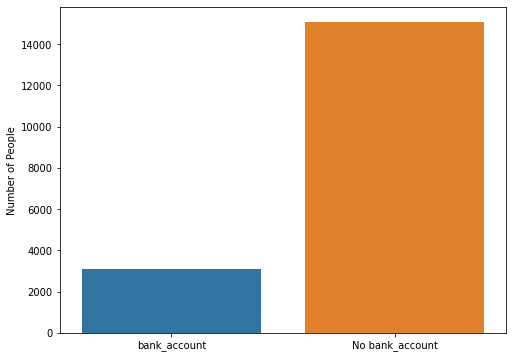

In [556]:
# Get number of people that have accounts and those that dont
pos = finance_df[finance_df["bank_account"] == 'Yes'].shape[0]
neg = finance_df[finance_df["bank_account"] == 'No'].shape[0]
print(f"With Bank Accounts = {pos}")
print(f"Without Bank Accounts = {neg}")
print(f"Proportion of people with bank_accounts  = {(pos / len(finance_df['bank_account'])) * 100:.2f}%")
print(f"Proportion of people without bank_accounts  = {(neg / len(finance_df['bank_account'])) * 100:.2f}%")                                                      
plt.figure(figsize=(8, 6))
sns.countplot(finance_df["bank_account"])
plt.xticks((0, 1), ["bank_account", "No bank_account"])
plt.xlabel("")
plt.ylabel("Number of People")
plt.title("", y=1, fontdict={"fontsize": 20});

From Urban = 3111
From Rural = 15062
Proportion of People leaving in urban areas = 38.35%
Proportion of People leaving in rural areas = 61.65%


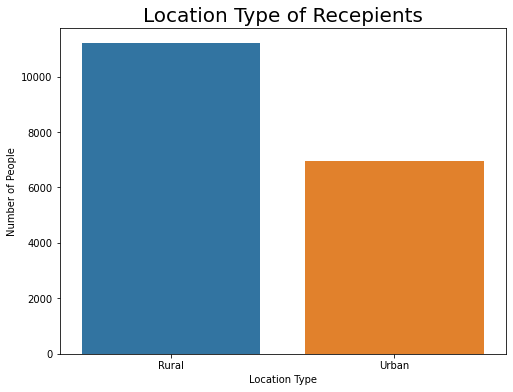

In [557]:
# Get number of people that live in rural areas and those that dont
urban = finance_df[finance_df["location"] == 'Urban'].shape[0]
rural = finance_df[finance_df["location"] == 'Rural'].shape[0]
print(f"From Urban = {pos}")
print(f"From Rural = {neg}")
print(f"Proportion of People leaving in urban areas = {(urban / len(finance_df['bank_account'])) * 100:.2f}%")
print(f"Proportion of People leaving in rural areas = {(rural / len(finance_df['bank_account'])) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(finance_df["location"])
plt.xticks((0, 1), ["Rural", "Urban"])
plt.xlabel("Location Type")
plt.ylabel("Number of People")
plt.title("Location Type of Recepients", y=1, fontdict={"fontsize": 20});

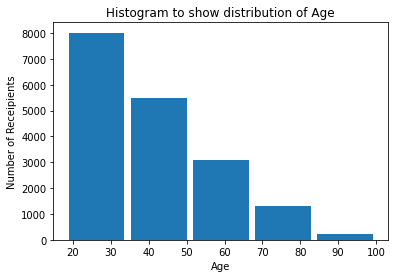

In [558]:
# Checking the distribution of age in the dataset
age = finance_df['age']

plt.hist(age, bins=5, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Number of Receipients')
plt.title('Histogram to show distribution of Age')
plt.show()

Majority of the respondents are between 20 and 33 Years old. Age is Positively Skewed with majority of the receipients being young people

# Bivariate Analysis

In [559]:
finance_df.head(2)

,country,year,bank_account,location,phone_access,household_size,age,gender,head_relationship,marital_status,education,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


How does the marital status affect financial inclusion in Africa?

bank_account               No   Yes
marital_status                     
Divorced/Seperated       1516   223
Dont know                   6     2
Married/Living together  6845  1765
Single/Never Married     4554   880
Widowed                  2141   241


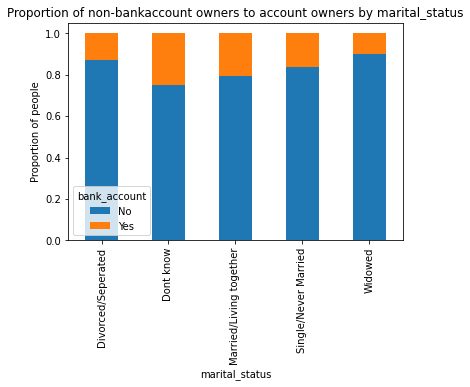

In [560]:
#Proportion of non-bankaccount owners to account owners by marital_status
print(pd.crosstab(finance_df['marital_status'],finance_df['bank_account']))
maritaltab=pd.crosstab(finance_df['marital_status'],finance_df['bank_account']) 
maritaltab.div(maritaltab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Proportion of non-bankaccount owners to account owners by marital_status')
plt.xlabel('marital_status') 
P = plt.ylabel('Proportion of people')

How does Gender affect financial inclusion in Africa?

bank_account    No   Yes
gender                  
Female        9436  1419
Male          5626  1692


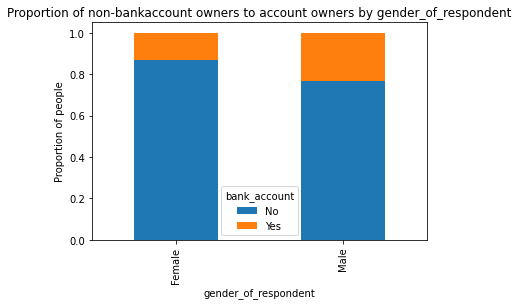

In [561]:
print(pd.crosstab(finance_df['gender'],finance_df['bank_account']))
gendertab=pd.crosstab(finance_df['gender'],finance_df['bank_account']) 
gendertab.div(gendertab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Proportion of non-bankaccount owners to account owners by gender_of_respondent')
plt.xlabel('gender_of_respondent') 
P = plt.ylabel('Proportion of people')

How does Level of education affect financial inclusion in Africa?

bank_account                       No   Yes
education                                  
6                                  21     5
No formal education              3660   174
Other/Dont know/RTA                 2     6
Primary education                8003  1024
Secondary education              2535   911
Tertiary education                511   555
Vocational/Specialised training   330   436


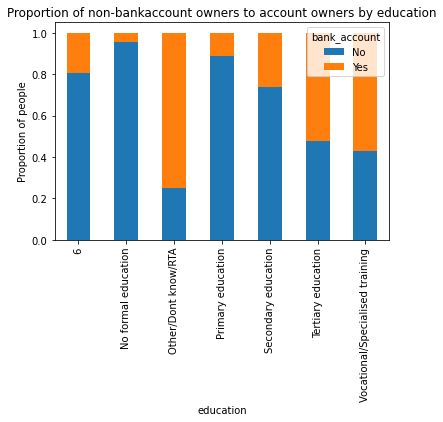

In [562]:
#Proportion of non-bankaccount owners to account owners by level of Education
print(pd.crosstab(finance_df['education'],finance_df['bank_account']))
educationtab=pd.crosstab(finance_df['education'],finance_df['bank_account']) 
educationtab.div(educationtab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Proportion of non-bankaccount owners to account owners by education')
plt.xlabel('education') 
P = plt.ylabel('Proportion of people')

In [563]:
#Dropping rows with either 6 or dont know as a response for education in the dataframe
finance_df = finance_df[(finance_df["education"]!= "6")]

In [564]:
finance_df = finance_df[(finance_df["education"]!= "Other/Dont know/RTA")]

bank_account                       No   Yes
education                                  
No formal education              3660   174
Primary education                8003  1024
Secondary education              2535   911
Tertiary education                511   555
Vocational/Specialised training   330   436


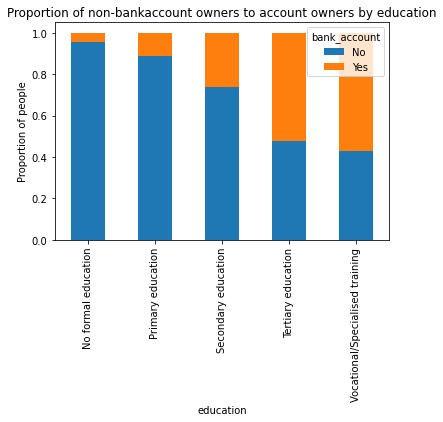

In [565]:
#Proportion of non-bankaccount owners to account owners by level of Education
print(pd.crosstab(finance_df['education'],finance_df['bank_account']))
educationtab=pd.crosstab(finance_df['education'],finance_df['bank_account']) 
educationtab.div(educationtab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Proportion of non-bankaccount owners to account owners by education')
plt.xlabel('education') 
P = plt.ylabel('Proportion of people')

We can see that the level of education seems to have an effect on the level of financial inclusion in Africa. People with higher education are more likely to own a bank account according to the data

How does the type of job a person has affect financial inclusion in Africa?

bank_account                    No  Yes
job_type                               
Dont Know/Refuse to answer     107   14
Farming and Fishing           3404  593
Formally employed Government    85  288
Formally employed Private      459  521
Government Dependent           190   48
Informally employed           3927  418
No Income                      459   12
Other Income                   801  188
Remittance Dependent          1690  219
Self employed                 3917  799


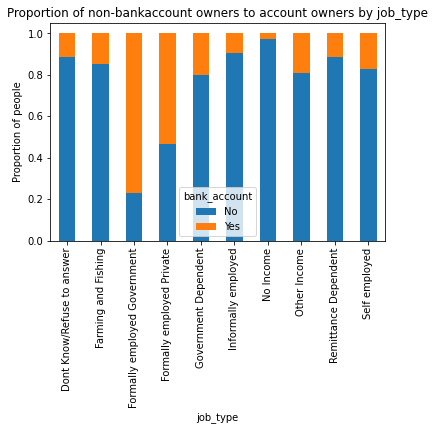

In [566]:
#Proportion of non-bankaccount owners to account owners by Job Type
print(pd.crosstab(finance_df['job_type'],finance_df['bank_account']))
jobtab=pd.crosstab(finance_df['job_type'],finance_df['bank_account']) 
jobtab.div(jobtab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Proportion of non-bankaccount owners to account owners by job_type')
plt.xlabel('job_type') 
P = plt.ylabel('Proportion of people')

From the data, respondents that were formally employed seemed to have a higher likelihood of owning a bank account compared to those that weren't formally employed. Repondents employed by the government had the highest chance of owning a bank account from the dataset.

What is the rate of financial inclusion in the 4 countries highlighted in this study?

In [567]:
finance_df.head(1)

,country,year,bank_account,location,phone_access,household_size,age,gender,head_relationship,marital_status,education,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


bank_account    No   Yes
country                 
Kenya         3958  1436
Rwanda        5397   942
Tanzania      3984   547
Uganda        1700   175


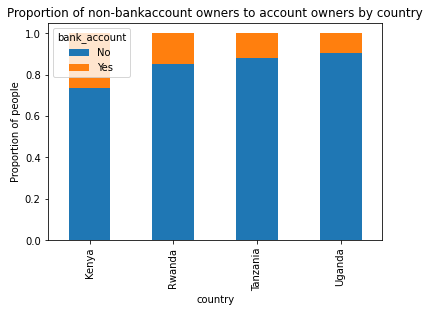

In [568]:
#Proportion of non-bankaccount owners to account owners by Country
print(pd.crosstab(finance_df['country'],finance_df['bank_account']))
countrytab=pd.crosstab(finance_df['country'],finance_df['bank_account']) 
countrytab.div(countrytab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Proportion of non-bankaccount owners to account owners by country')
plt.xlabel('country') 
P = plt.ylabel('Proportion of people')

From the data collected, Kenya had the highest rate of financial inclusion where atleast 20% of respondents had a bank account. Uganda had the least rate of financial inclusion of the 4 countries 

Does there exist any correlation between age and household size?

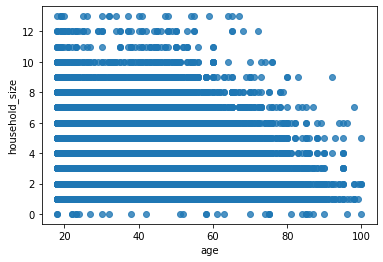

In [569]:
sns.regplot(x = finance_df["age"], y = finance_df["household_size"], fit_reg=False)

There doesnt seem to exist any correlation between age and household size.

# Multivariate Analysis

Principal Component Analysis

Step 1 is to convert all the categorial variables into numeric since PCA only works with numeric Data

In [570]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18139 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            18139 non-null  object 
 1   year               18139 non-null  int64  
 2   bank_account       18139 non-null  object 
 3   location           18139 non-null  object 
 4   phone_access       18139 non-null  object 
 5   household_size     18139 non-null  float64
 6   age                18139 non-null  float64
 7   gender             18139 non-null  object 
 8   head_relationship  18139 non-null  object 
 9   marital_status     18139 non-null  object 
 10  education          18139 non-null  object 
 11  job_type           18139 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.8+ MB


In [571]:
finance_df["country"] = finance_df["country"].astype('category')
finance_df["bank_account"] = finance_df["bank_account"].astype('category')
finance_df["location"] = finance_df["location"].astype('category')
finance_df["phone_access"] = finance_df["phone_access"].astype('category')
finance_df["gender"] = finance_df["gender"].astype('category')
finance_df["head_relationship"] = finance_df["head_relationship"].astype('category')
finance_df["marital_status"] = finance_df["marital_status"].astype('category')
finance_df["education"] = finance_df["education"].astype('category')
finance_df["job_type"] = finance_df["job_type"].astype('category')

In [572]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18139 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            18139 non-null  category
 1   year               18139 non-null  int64   
 2   bank_account       18139 non-null  category
 3   location           18139 non-null  category
 4   phone_access       18139 non-null  category
 5   household_size     18139 non-null  float64 
 6   age                18139 non-null  float64 
 7   gender             18139 non-null  category
 8   head_relationship  18139 non-null  category
 9   marital_status     18139 non-null  category
 10  education          18139 non-null  category
 11  job_type           18139 non-null  category
dtypes: category(9), float64(2), int64(1)
memory usage: 727.8 KB


In [573]:
finance_df["country"] = finance_df["country"].cat.codes
finance_df["bank_account"] = finance_df["bank_account"].cat.codes
finance_df["location"] = finance_df["location"].cat.codes
finance_df["phone_access"] = finance_df["phone_access"].cat.codes
finance_df["gender"] = finance_df["gender"].cat.codes
finance_df["head_relationship"] = finance_df["head_relationship"].cat.codes
finance_df["marital_status"] = finance_df["marital_status"].cat.codes
finance_df["education"] = finance_df["education"].cat.codes
finance_df["job_type"] = finance_df["job_type"].cat.codes

In [574]:
finance_df

,country,year,bank_account,location,phone_access,household_size,age,gender,head_relationship,marital_status,education,job_type
0,0,2018,1,0,1,3.0,24.0,0,5,2,2,9
1,0,2018,0,0,0,5.0,70.0,0,1,4,0,4
2,0,2018,1,1,1,5.0,26.0,1,3,3,4,9
3,0,2018,0,0,1,5.0,34.0,0,1,2,1,3
4,0,2018,0,1,0,8.0,26.0,1,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,0,0,1,4.0,48.0,0,1,0,0,7
23520,3,2018,0,0,1,2.0,27.0,0,1,3,2,7
23521,3,2018,0,0,1,5.0,27.0,0,4,4,1,7
23522,3,2018,0,1,1,7.0,30.0,0,4,0,2,9


In [575]:
#Preprocessing
X = finance_df.drop('bank_account', 1)
y = finance_df['bank_account']

In [576]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [577]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [578]:
#PCA With 1 Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


principalDf = pd.DataFrame(data = X_train
             , columns = ['principal component 1'])

In [579]:
principalDf

,principal component 1
0,0.832127
1,0.288279
2,1.284612
3,0.720379
4,0.983667
...,...
14506,-1.563182
14507,1.972236
14508,1.230578
14509,-0.711856


In [580]:
# Calculating the Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.15891039])

In [581]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [582]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3023    0]
 [ 605    0]]
Accuracy 0.8332414553472988


Lets attempt with 2 Components

In [583]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

principalDf2 = pd.DataFrame(data = X_train
             , columns = ['principal component 1','principal component 2'])
principalDf2

,principal component 1,principal component 2
0,0.832127,-0.587738
1,0.288279,-0.556884
2,1.284612,-0.442194
3,0.720379,-0.713136
4,0.983667,0.336308
...,...,...
14506,-1.563182,-0.846845
14507,1.972236,1.285275
14508,1.230578,-0.080963
14509,-0.711856,-1.096629


In [584]:
# Calculating the Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.15891039, 0.15510735])

principal component 1 holds 15.9% of the information while the principal component 2 holds 15.5% of the information. Around 60% of data was lost

In [585]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [586]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[3023    0]
 [ 605    0]]
Accuracy 0.8332414553472988


The number of components does not affect the accuracy. FOr this reason, 1 component can be assumed to be achieving the optimum accuracy level.